In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [3]:
df=pd.read_csv("C:\\Users\\kasir\\anaconda3.1\\dataset_diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### This is a diabetes predictor problem where we have to predicat whether a person has diabetes based on various information available. 

This is a Binary Classification problem. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
round(df['Glucose'].mean())
df['Glucose']=df['Glucose'].replace(0,round(df['Glucose'].mean()))

In [9]:
round(df['BloodPressure'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,round(df['BloodPressure'].mean()))

In [10]:
round(df['BMI'].mean())
df['BMI']=df['BMI'].replace(0,round(df['BMI'].mean()))

In [11]:
round(df['Insulin'].mean())
df['Insulin']=df['Insulin'].replace(0,round(df['Insulin'].mean()))

In [12]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
y=df.pop("Outcome")

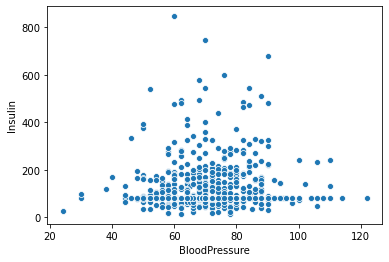

In [14]:
sns.scatterplot(x=df['BloodPressure'],y=df['Insulin'])

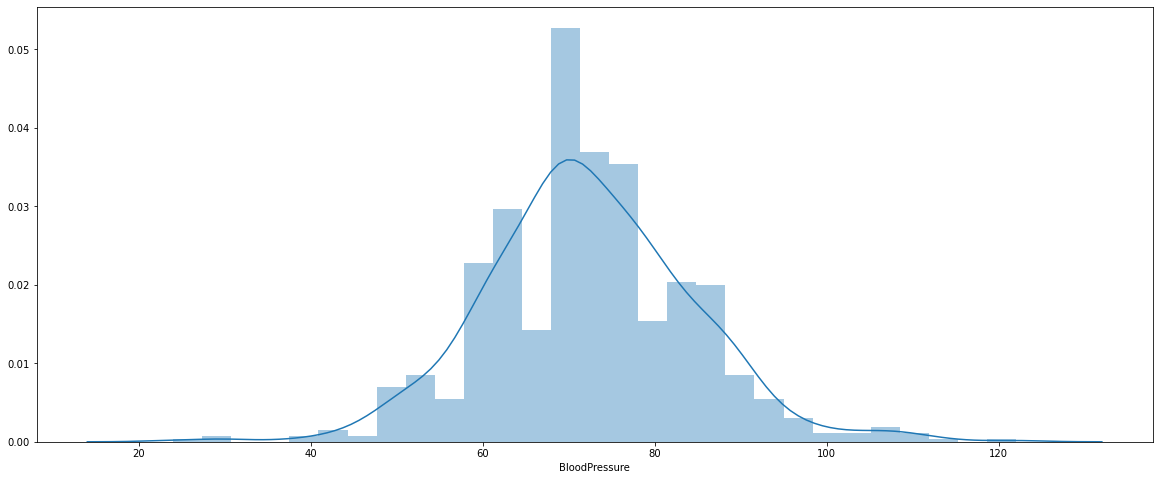

In [15]:
plt.figure(figsize=(20,8))
sns.distplot(df['BloodPressure'])

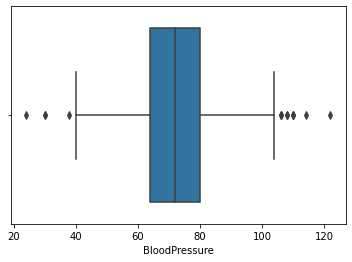

In [16]:
sns.boxplot(x=df['BloodPressure'])

#### Here we can see that we have a few people who's blood pressure is outside the quartile range.

#### But it is okay as we can have blood pressure in any range.

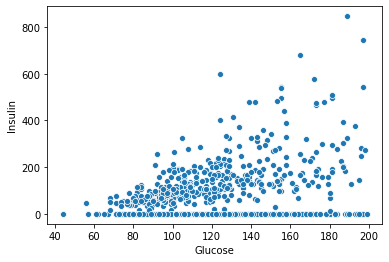

In [12]:
sns.scatterplot(x=df['Glucose'],y=df['Insulin'])

In [13]:
df['Insulin'].mean()
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [14]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
median_B=np.median(df['BloodPressure'])
up_qb=np.percentile(df['BloodPressure'],75)
lo_qb=np.percentile(df['BloodPressure'],25)
iqr=up_qb - lo_qb
up_whb=df[df['BloodPressure']<up_qb+1.5*iqr].max()
lo_whb=df[df['BloodPressure']>lo_qb-1.5*iqr].min()

In [ ]:
len(df.col.unique())

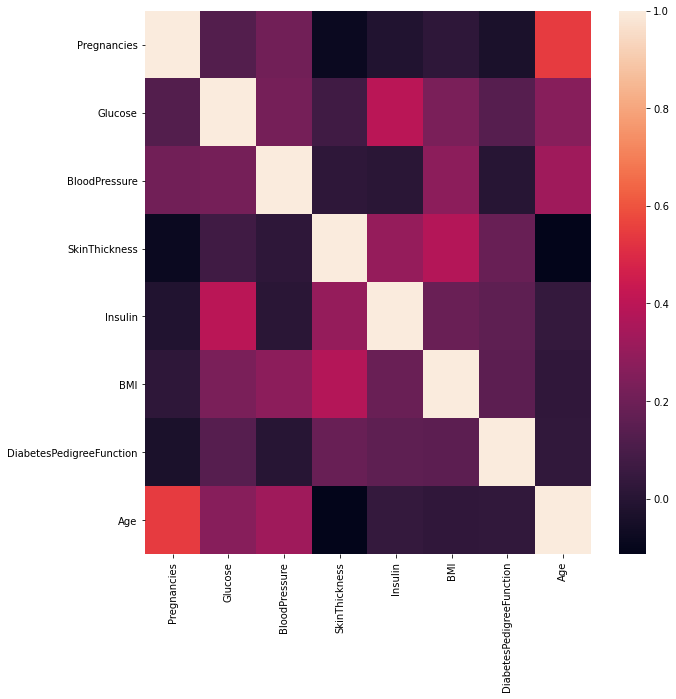

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

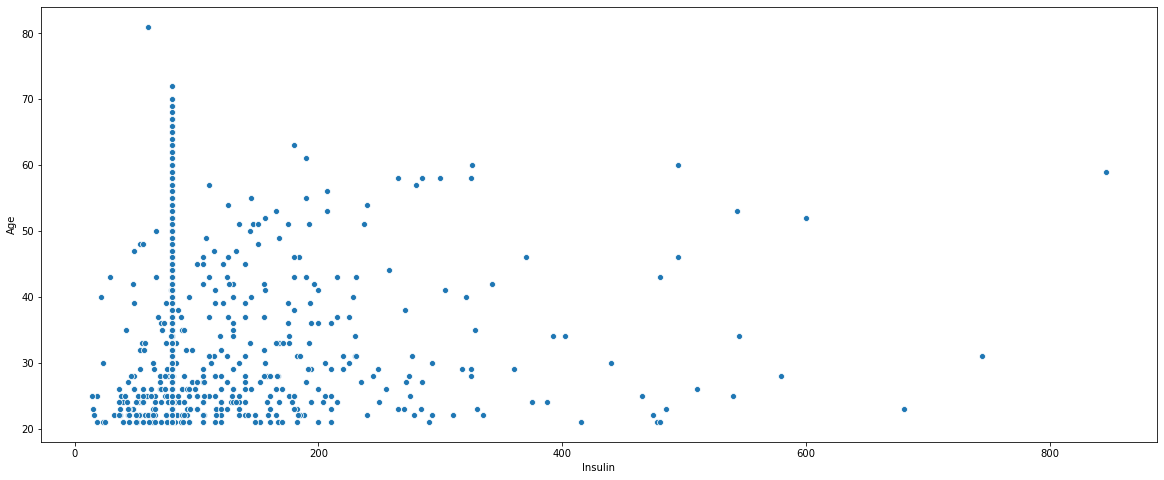

In [18]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df,x='Insulin',y='Age')

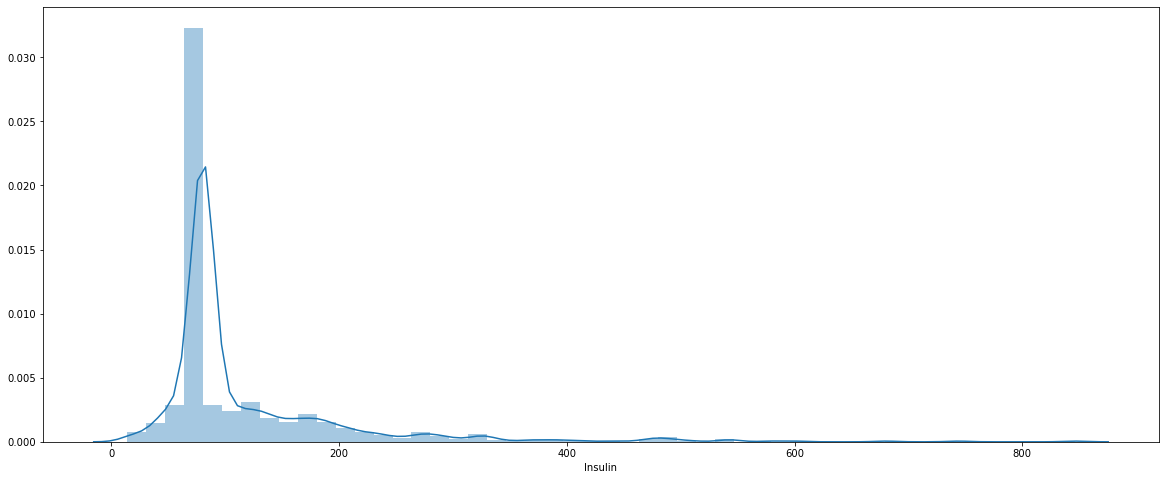

In [19]:
plt.figure(figsize=(20,8))
sns.distplot(df['Insulin'])

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.682292,72.250000,20.536458,118.757812,32.450911,0.471876,33.240885
std,3.369578,30.435999,12.117203,15.952218,93.039581,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,0.000000,80.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,80.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Exploratory Data Analysis

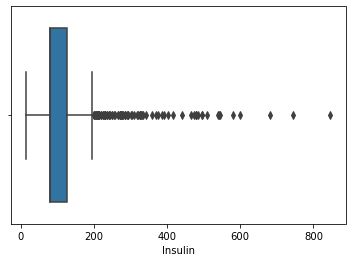

In [21]:
sns.boxplot(x=df['Insulin'])

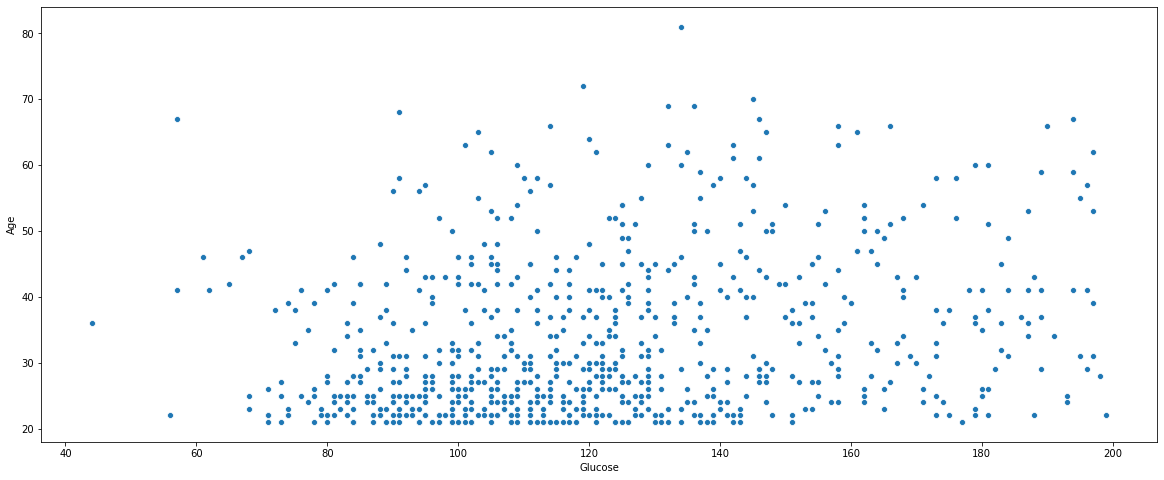

In [22]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df,x='Glucose',y='Age')

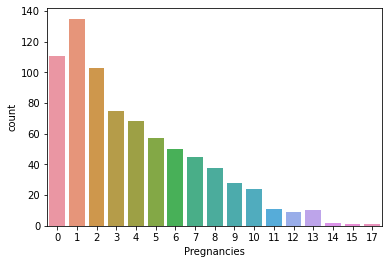

In [23]:
sns.countplot(x=df['Pregnancies'])

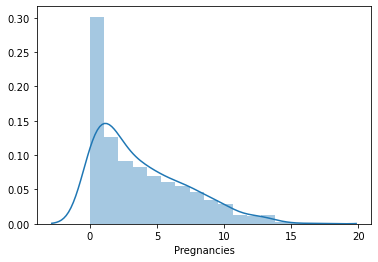

In [24]:
sns.distplot(df['Pregnancies'])

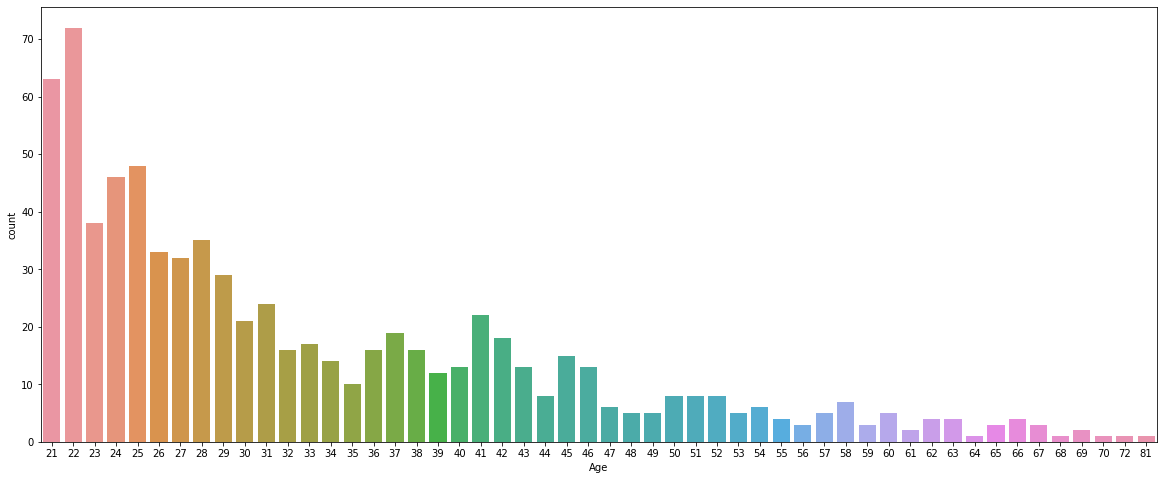

In [25]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Age'])

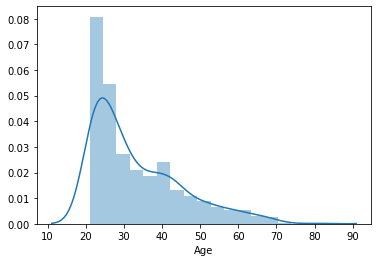

In [26]:
sns.distplot(df['Age'])

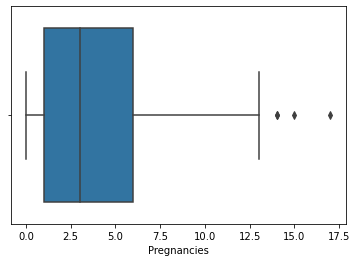

In [27]:
sns.boxplot(x=df['Pregnancies'])

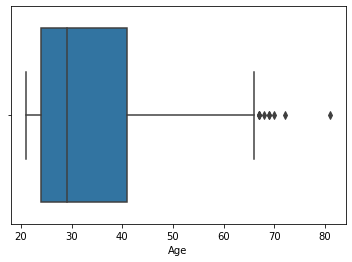

In [28]:
sns.boxplot(x=df['Age'])

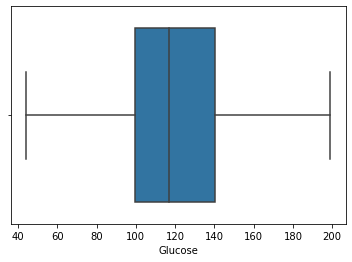

In [29]:
sns.boxplot(x=df['Glucose'])

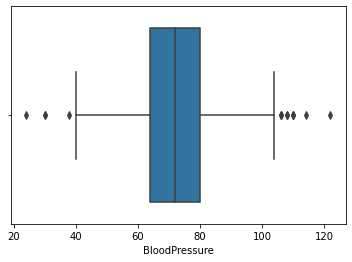

In [30]:
sns.boxplot(x=df['BloodPressure'])

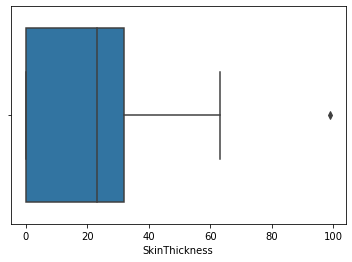

In [31]:
sns.boxplot(x=df['SkinThickness'])

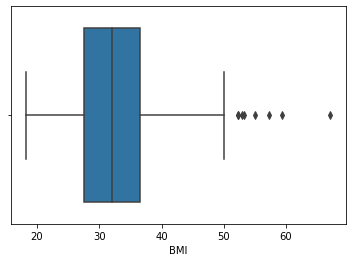

In [32]:
sns.boxplot(x=df['BMI'])

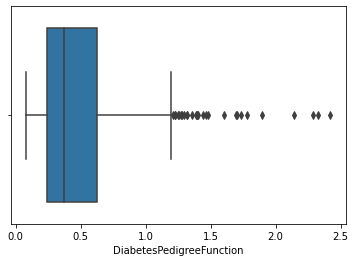

In [33]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])

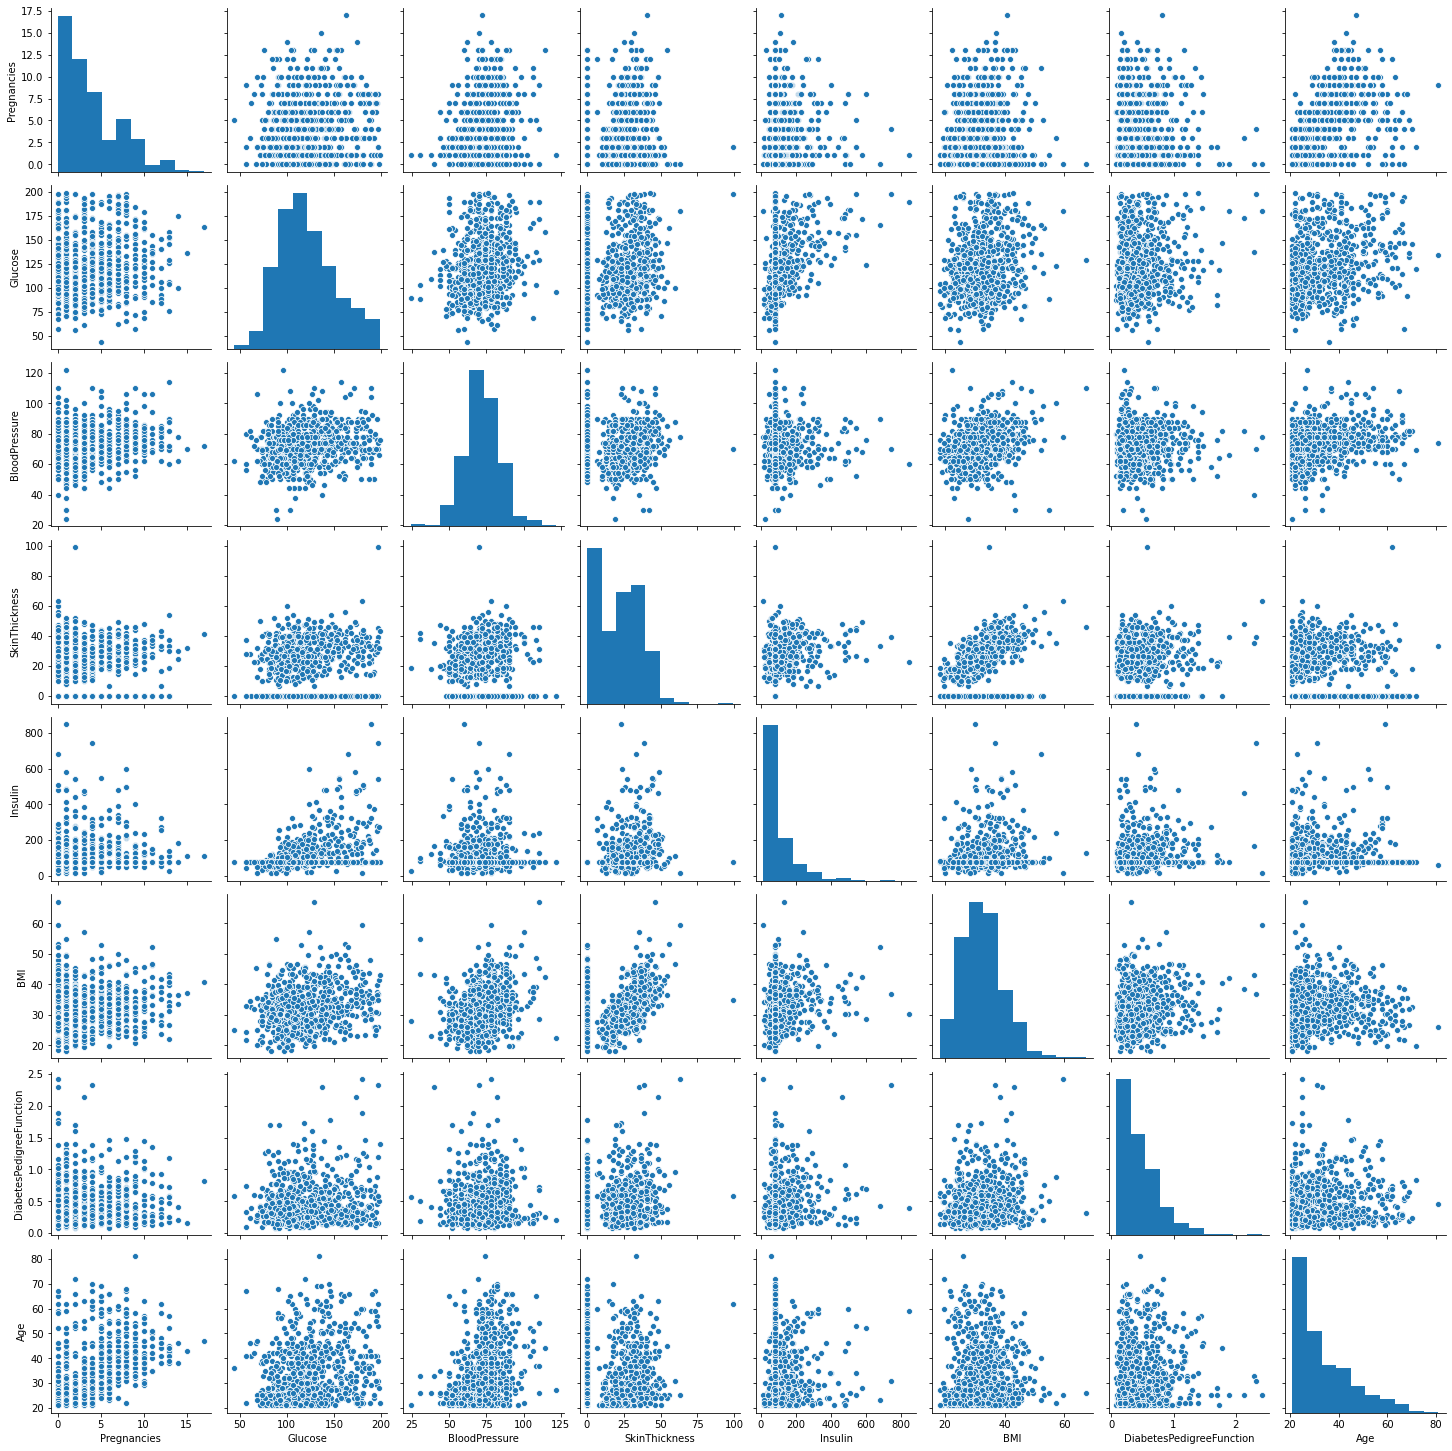

In [34]:
sns.pairplot(df)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=100)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [42]:
log.fit(X_train,y_train)

LogisticRegression()

In [43]:
predictions=log.predict(X_test)

In [44]:
score=log.score(X_test,y_test)
print(score)

0.7337662337662337


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,predictions))

0.7337662337662337


In [47]:
y_pred = log.predict(X_test)

In [49]:
print(confusion_matrix(y_test,y_pred))

[[85 16]
 [25 28]]


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       101
           1       0.64      0.53      0.58        53

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [51]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.6849430226041471


### We have made small changes in the logistic regression by modifying penalty values, solver and maximum iterations.

In [55]:
log_wt=LogisticRegression(penalty='l2',class_weight='balanced',solver='newton-cg',max_iter=200,n_jobs=-1)

In [56]:
log_wt.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=200, n_jobs=-1,
                   solver='newton-cg')

In [57]:
y_pred_wt=log_wt.predict(X_test)

In [58]:
print(accuracy_score(y_test,y_pred_wt))

0.7077922077922078


In [60]:
print(classification_report(y_test,y_pred_wt))

              precision    recall  f1-score   support

           0       0.80      0.73      0.77       101
           1       0.56      0.66      0.61        53

    accuracy                           0.71       154
   macro avg       0.68      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



In [61]:
print(confusion_matrix(y_test,y_pred_wt))

[[74 27]
 [18 35]]


In [62]:
print(roc_auc_score(y_test,y_pred_wt))

0.6965253129086493


#### As we can see in the above cell, the accuracy score decreases.